# Short explanation of a t test
- t test tests the likelihood of obtaining a value of t from a normal population
- t is a weighted mean in a sense. More specifically, t is the difference between two means divided by (weighted by) a standard deviation.
- There is more than 1 way to perform a t test. We will start with a single sample t test and move on to other types of t tests later.

# "Single sample" t test
- One, it should be noted that researchers working at Guinness Brewer are often credited with creating the t test while studying barley...
- $t = \frac{\bar{X}-\mu}{\bar{\sigma}}\sqrt{n}$ where
    - $\bar{X}$ is the sample mean
    - $\mu$ is a hypothesized mean
    - n is the # of measurements collected 
    - $\bar{\sigma}$ is the sample standard deviation
- And it is assumed that all data measured comes from a normal distribution.

# Problem 1: Estimate p value using a brute-force sampled distributions of t.

*This is identifcally what we did in class.*

Step 1: Generate a normally distributed population.

Let's start by ensuring we understand how to sample normally distributed data. Using random.norm from numpy, randomly sample 10,000 values from a normal distribution whose mean is 12 and standard deviation is 2. Save the values in a variable called norm_data. Plot a histogram of the collected values and then plot a density plot of the collected values. 

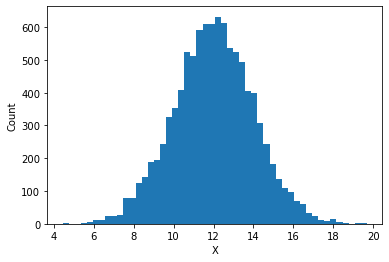

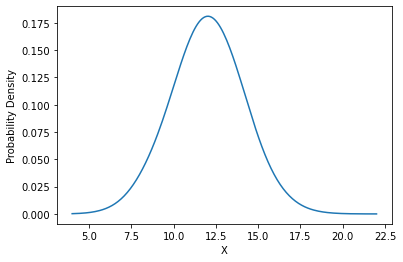

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
from scipy.stats import gaussian_kde

mu = 12
sigma = 2
norm_data = np.random.normal(mu,sigma,10000);
plt.subplots();
plt.hist(norm_data, bins = 50)
plt.xlabel('X')
plt.ylabel('Count')
plt.show()

density = gaussian_kde(norm_data)
x_vals = np.linspace(4,22,200)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x_vals,density(x_vals))
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.show()


Step 2: Use your normally distributed population to generate a "null distribution" of t values for **when n = 3.**

The idea of a null hypothesis can be tricky without some practice. To generate a null hypothesis for any statistic requires choosing representative values, in this case for the population mean $\mu$. Ultimatelty, we are asking "if I know the what my population is, then how much variation is expected in the value of t when I collect data from my defined population?" 

To do this, write a for-loop in which you collect 3 samples from your normal distribution data (norm_data) above and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values.

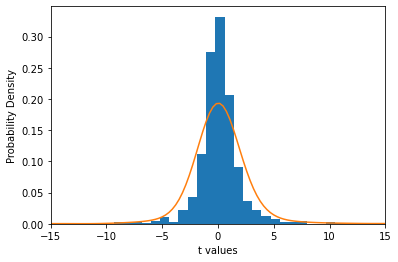

In [2]:
n=3
t = np.zeros(1000)

for m in np.arange(0,1000,1):
    tmp = random.sample(list(norm_data),n)
    t[m] = ((np.mean(tmp) - mu)*np.sqrt(n))/np.std(tmp, ddof=1)
    
plt.hist(t, density = True, bins = 100)
plt.xlim(-15,15);

density = gaussian_kde(t)
x = np.linspace(-15, 15, 100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x,density(x))
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.xlabel("t values")
plt.ylabel("Probability Density")
plt.show()

Check that distribution works correctly.

Let's ensure that we can use our distribution to estimate a p value. You take 3 random measurements and get these numbers: 9.45, 10.3, and 11. Calculate and print your t value (call it t_val) and use your t distribution to estimate the odds of obtaining a t that is less than or equal to t_val. 

Check your answer by using stats.ttest_1samp to compare your p value with a p value calculated using the stats library.

In [3]:
numbers = [9.45,10.3,11]

t_val = ((np.mean(numbers) - mu)*np.sqrt(n))/np.std(tmp, ddof=1)
print(f'The value of t from the given numbers is {t_val:0.2f}')
print("Looking at our plot, the odds of obtaining a t value that is less that or equal to our t value is P = 0.05\n")

print("The calculated p value using the stats library is:")
print(stats.ttest_1samp(numbers, popmean=mu))

The value of t from the given numbers is -61.56
Looking at our plot, the odds of obtaining a t value that is less that or equal to our t value is P = 0.05

The calculated p value using the stats library is:
Ttest_1sampResult(statistic=-3.9049920173544073, pvalue=0.05976013788177793)


# Problem 2: Does changing the number of samples collected (n) change the t distribution?

Step 3: Repeat step 2 but collect 6 samples from your normal distributions and the calculate t for each iteration. How do the density plots compare to the answer in Problem 1? Your answer must be clear.

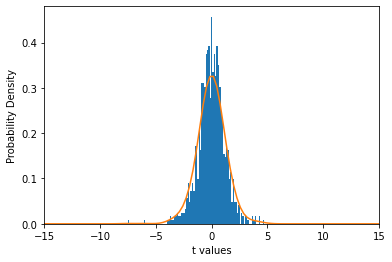

The density plot with n=6 has a higher probablilty that the t value will be zero 
and a much more normal distribution of values.


In [4]:
n=6
t = np.zeros(1000)

for m in np.arange(0,1000,1):
    tmp = random.sample(list(norm_data),n)
    t[m] = ((np.mean(tmp) - mu)*np.sqrt(n))/np.std(tmp, ddof=1)
    
plt.hist(t, density = True, bins = 100)
plt.xlim(-15,15);

density = gaussian_kde(t)
x = np.linspace(-15, 15, 100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x,density(x))
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.xlabel("t values")
plt.ylabel("Probability Density")
plt.show()
print("The density plot with n=6 has a higher probablilty that the t value will be zero \nand a much more normal distribution of values.")

# Problem 3: Does changing the mean and standard deviation of the population change the t distribution?

Step 4: We will skip step 1 this time and just directly pull samples from the population using random.norm($\mu$,$\sigma$,n=3). Write a for-loop in which you collect 3 samples from a normal distribution that has a mean of 6 and a standard deviation of 3 and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values. Compare the t distribution to the t distribution estimated in Problem 1 and Comment.

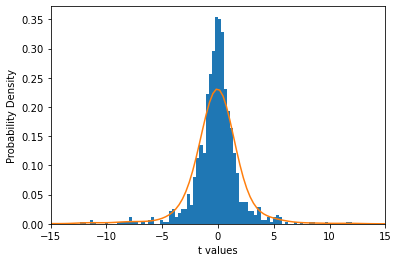

The t distribution estimated in problem 1 looks very similar to the actual t distribution obtained in this problem
although this distribution has more steps and has a slightly higher probability for t=0


In [5]:
n=3
t = np.zeros(1000)
mu = 6
sigma = 3

for m in np.arange(0,1000,1):
    tmp = np.random.normal(mu,sigma,n)
    t[m] = ((np.mean(tmp) - mu)*np.sqrt(n))/np.std(tmp, ddof=1)
    
plt.hist(t, density = True, bins = 100)
plt.xlim(-15,15);

density = gaussian_kde(t)
x = np.linspace(-15, 15, 100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x,density(x))
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.xlabel("t values")
plt.ylabel("Probability Density")
plt.show()
print("The t distribution estimated in problem 1 looks very similar to the actual t distribution obtained in this problem\nalthough this distribution has more steps and has a slightly higher probability for t=0")

# Our takeways 

- t is used to determine the likelihood of obtaining a value of t with n measurements sampled from a normal distribution.
    - Interesting, the effect of n and the choice of $\mu$ and $\sigma$: **The value of n has the largest effect on the t distribution where a larger sample size directly correlates with mores steps and a higher probablility desity of t=0. Changing the mean and standard deviation has a smaller effect where we still see more steps in the graph and a sightly higher probability of t=0, but not to the extent of changing n.**
- Note we have only covered the "single sample" t test here. A more commonly used t test is the two sample, which we'll cover next.